In [114]:
from IPython.lib import passwd

In [117]:
passwd()


Enter password: ········
Verify password: ········


'sha1:ce8261a3d67f:c2f51fec8f0bc8022a29183c1c9bc15c6812df6c'

In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import collections, numpy
import sklearn.linear_model as LinearRegression
from sklearn.linear_model import LogisticRegression
import sklearn.cross_validation as cross_validation
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

C:\Users\SHIVANGI\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
adult = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', names=['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num', 'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Native-country', 'Income'], sep=r'\s*,\s*', engine='python', na_values="?")
adult.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
X = adult.drop('Income', 1)
y = adult.Income

In [5]:
for col_name in X.columns:
    if X[col_name].dtypes == 'object':
        unique_cat = len(X[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'Workclass' has 9 unique categories
Feature 'Education' has 16 unique categories
Feature 'Marital-status' has 7 unique categories
Feature 'Occupation' has 15 unique categories
Feature 'Relationship' has 6 unique categories
Feature 'Race' has 5 unique categories
Feature 'Sex' has 2 unique categories
Feature 'Native-country' has 42 unique categories


In [6]:
adult.isnull().sum()

Age                  0
Workclass         1836
fnlwgt               0
Education            0
Education-num        0
Marital-status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
Hours-per-week       0
Native-country     583
Income               0
dtype: int64

In [7]:
print (adult.shape)

(32561, 15)


In [8]:
adult["Marital-status"].replace(['Divorced', 'Married-AF-spouse', 
              'Married-civ-spouse', 'Married-spouse-absent', 
              'Never-married','Separated','Widowed'],
             ['not married','married','married','married',
              'not married','not married','not married'], inplace = True)

In [9]:
(adult["Marital-status"].value_counts() / adult.shape[0])

not married    0.526519
married        0.473481
Name: Marital-status, dtype: float64

In [10]:
adult["Marital-status"].replace('married',1,inplace=True)
adult["Marital-status"].replace('not married', 0,inplace=True)

In [11]:
adult["Sex"].replace('Female',1,inplace=True)
adult["Sex"].replace('Male',0,inplace=True)

In [12]:
X = adult
X['Native-country'] = ['United-States' if x=='United-States' else 'others' for x in X['Native-country']]

In [13]:
adult["Native-country"].value_counts()

United-States    29170
others            3391
Name: Native-country, dtype: int64

In [14]:
adult["Income"].value_counts()

<=50K    24720
>50K      7841
Name: Income, dtype: int64

In [15]:
adult["Income"].replace('<=50K',1,inplace=True)
adult["Income"].replace('>50K',0,inplace=True)

In [16]:
adult["Native-country"].replace('United-States',1,inplace=True)
adult["Native-country"].replace('others',0,inplace=True)
adult.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,0,Adm-clerical,Not-in-family,White,0,2174,0,40,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,1,Exec-managerial,Husband,White,0,0,0,13,1,1
2,38,Private,215646,HS-grad,9,0,Handlers-cleaners,Not-in-family,White,0,0,0,40,1,1
3,53,Private,234721,11th,7,1,Handlers-cleaners,Husband,Black,0,0,0,40,1,1
4,28,Private,338409,Bachelors,13,1,Prof-specialty,Wife,Black,1,0,0,40,0,1


In [17]:
adult=pd.get_dummies(adult, columns=["Race","Occupation","Workclass","Education","Relationship"],dummy_na=False)

In [18]:
adult

,Age,fnlwgt,Education-num,Marital-status,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income,...,Education_Masters,Education_Preschool,Education_Prof-school,Education_Some-college,Relationship_Husband,Relationship_Not-in-family,Relationship_Other-relative,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife
0,39,77516,13,0,0,2174,0,40,1,1,...,0,0,0,0,0,1,0,0,0,0
1,50,83311,13,1,0,0,0,13,1,1,...,0,0,0,0,1,0,0,0,0,0
2,38,215646,9,0,0,0,0,40,1,1,...,0,0,0,0,0,1,0,0,0,0
3,53,234721,7,1,0,0,0,40,1,1,...,0,0,0,0,1,0,0,0,0,0
4,28,338409,13,1,1,0,0,40,0,1,...,0,0,0,0,0,0,0,0,0,1
5,37,284582,14,1,1,0,0,40,1,1,...,1,0,0,0,0,0,0,0,0,1
6,49,160187,5,1,1,0,0,16,0,1,...,0,0,0,0,0,1,0,0,0,0
7,52,209642,9,1,0,0,0,45,1,0,...,0,0,0,0,1,0,0,0,0,0
8,31,45781,14,0,1,14084,0,50,1,0,...,1,0,0,0,0,1,0,0,0,0
9,42,159449,13,1,0,5178,0,40,1,0,...,0,0,0,0,1,0,0,0,0,0


In [19]:
adult.isnull().sum()

Age                             0
fnlwgt                          0
Education-num                   0
Marital-status                  0
Sex                             0
Capital-gain                    0
Capital-loss                    0
Hours-per-week                  0
Native-country                  0
Income                          0
Race_Amer-Indian-Eskimo         0
Race_Asian-Pac-Islander         0
Race_Black                      0
Race_Other                      0
Race_White                      0
Occupation_Adm-clerical         0
Occupation_Armed-Forces         0
Occupation_Craft-repair         0
Occupation_Exec-managerial      0
Occupation_Farming-fishing      0
Occupation_Handlers-cleaners    0
Occupation_Machine-op-inspct    0
Occupation_Other-service        0
Occupation_Priv-house-serv      0
Occupation_Prof-specialty       0
Occupation_Protective-serv      0
Occupation_Sales                0
Occupation_Tech-support         0
Occupation_Transport-moving     0
Workclass_Fede

In [20]:
X = adult.drop('Income', 1)
y = adult.Income

list(adult)

In [21]:
ccorr =adult.corrwith(adult["Income"]).sort_values(ascending= False).head()

feature_cols =['Age',
 'fnlwgt',
 'Education-num',
 'Marital-status',
 'Sex',
 'Capital-gain',
 'Capital-loss',
 'Hours-per-week',
 'Native-country',
 'Race_Amer-Indian-Eskimo',
 'Race_Asian-Pac-Islander',
 'Race_Black',
 'Race_Other',
 'Race_White',
 'Occupation_Adm-clerical',
 'Occupation_Armed-Forces',
 'Occupation_Craft-repair',
 'Occupation_Exec-managerial',
 'Occupation_Farming-fishing',
 'Occupation_Handlers-cleaners',
 'Occupation_Machine-op-inspct',
 'Occupation_Other-service',
 'Occupation_Priv-house-serv',
 'Occupation_Prof-specialty',
 'Occupation_Protective-serv',
 'Occupation_Sales',
 'Occupation_Tech-support',
 'Occupation_Transport-moving',
 'Workclass_Federal-gov',
 'Workclass_Local-gov',
 'Workclass_Never-worked',
 'Workclass_Private',
 'Workclass_Self-emp-inc',
 'Workclass_Self-emp-not-inc',
 'Workclass_State-gov',
 'Workclass_Without-pay',
 'Education_10th',
 'Education_11th',
 'Education_12th',
 'Education_1st-4th',
 'Education_5th-6th',
 'Education_7th-8th',
 'Education_9th',
 'Education_Assoc-acdm',
 'Education_Assoc-voc',
 'Education_Bachelors',
 'Education_Doctorate',
 'Education_HS-grad',
 'Education_Masters',
 'Education_Preschool',
 'Education_Prof-school',
 'Education_Some-college',
 'Relationship_Husband',
 'Relationship_Not-in-family',
 'Relationship_Other-relative',
 'Relationship_Own-child',
 'Relationship_Unmarried',
 'Relationship_Wife']

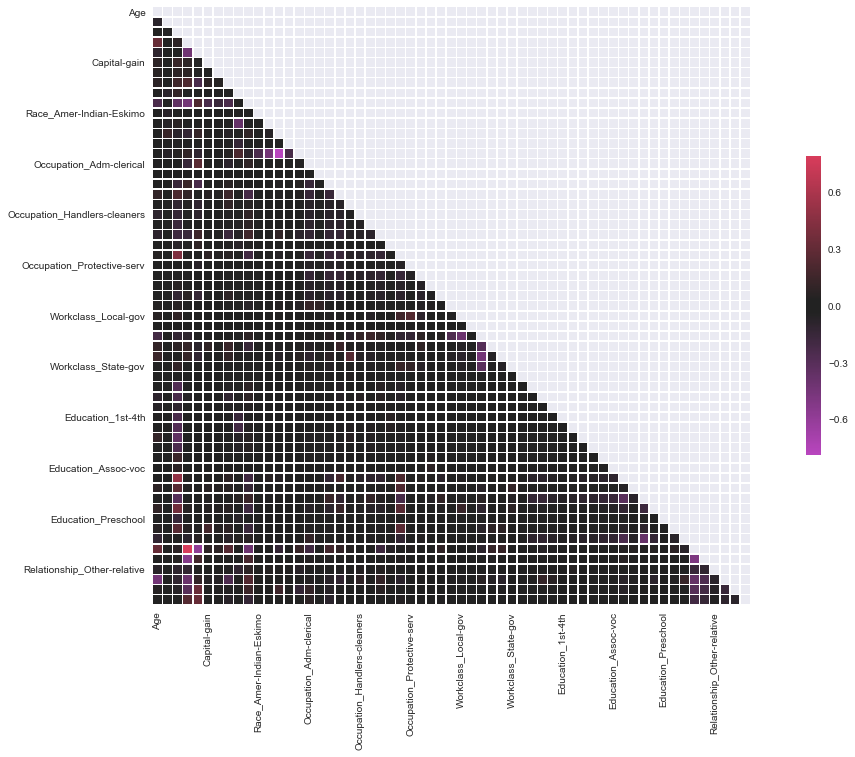

In [22]:
corr = adult.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(-55, 5, center ="dark",as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5,linecolor='white', yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [23]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(32561,)


In [24]:
logreg = LogisticRegression()
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
len(logreg.predict(X))

32561

In [26]:
y_pred = logreg.predict(X)

In [27]:
len(y_pred)

32561

In [28]:
from sklearn import metrics
print(metrics.accuracy_score(y, y_pred))

0.797948465956


In [58]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(adult.shape)
print(X.shape)

(22792, 58)
(9769, 58)
(22792,)
(9769,)
(32561, 59)
(32561, 58)


In [59]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.805097758215


In [29]:
def plot_histogram(adult):
    plt.hist(adult, color='blue', alpha=0.5)
    plt.title("Histogram of '{var_name}'".format(var_name=adult.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

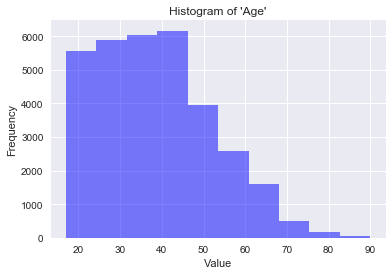

In [30]:
plot_histogram(adult['Age'])

In [31]:
def plot_histogram_dv(adult,y):
    plt.hist(list(adult[y==0]), alpha=0.5, label='Outcome=0',bins=10)
    plt.hist(list(adult[y==1]), alpha=0.5, label='Outcome=1')
    plt.title("Histogram of '{var_name}' by Outcome Category".format(var_name=adult.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc='upper right')
    plt.show()

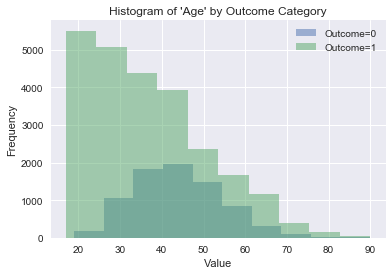

In [32]:
plot_histogram_dv(adult['Age'], y)

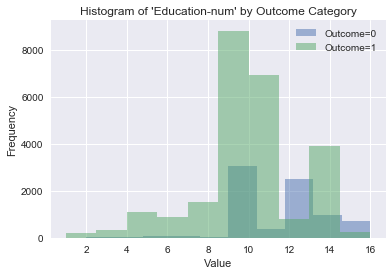

In [61]:
plot_histogram_dv(adult['Education-num'], y)

In [33]:
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_interactions(adult):
    # Get feature names
    combos = list(combinations(list(adult.columns), 2))
    colnames = list(adult.columns) + ['_'.join(x) for x in combos]
    
    # Find interactions
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    adult = poly.fit_transform(adult)
    adult = pd.DataFrame(adult)
    adult.columns = colnames
    
    # Remove interaction terms with all 0 values            
    noint_indicies = [i for i, x in enumerate(list((adult == 0).all())) if x]
    adult = adult.drop(adult.columns[noint_indicies], axis=1)
    
    return adult

In [69]:
X1 = add_interactions(adult)
print(X1.head(3))

    Age    fnlwgt  Education-num  Marital-status  Sex  Capital-gain  \
0  39.0   77516.0           13.0             0.0  0.0        2174.0   
1  50.0   83311.0           13.0             1.0  0.0           0.0   
2  38.0  215646.0            9.0             0.0  0.0           0.0   

   Capital-loss  Hours-per-week  Native-country  Income  \
0           0.0            40.0             1.0     1.0   
1           0.0            13.0             1.0     1.0   
2           0.0            40.0             1.0     1.0   

                     ...                     \
0                    ...                      
1                    ...                      
2                    ...                      

   Education_Prof-school_Relationship_Other-relative  \
0                                                0.0   
1                                                0.0   
2                                                0.0   

   Education_Prof-school_Relationship_Own-child  \
0            

In [35]:
adult_unprocessed = adult
adult_unprocessed = adult_unprocessed.dropna(axis=0, how='any')
print(adult.shape)
print(adult_unprocessed.shape)

(32561, 59)
(32561, 59)


In [70]:
pca = PCA(n_components=10)
X_reduced = pd.DataFrame(pca.fit_transform(X1))

In [71]:
X_reduced.head()

,0,1,2,3,4,5,6,7,8,9
0,-3.631343e+07,-1.623398e+07,-6.091225e+06,1.532397e+04,5.734382e+04,-42456.849032,-7573.552139,-100703.844918,13241.283219,-47476.840100
1,-2.048334e+08,-1.645419e+07,-6.698053e+06,2.217323e+06,3.114250e+05,32649.765701,-122447.356449,-21552.951365,11106.589215,-15060.574278
2,-2.048297e+08,-1.638055e+07,1.614642e+06,6.729733e+04,-1.574112e+05,17784.378145,165022.944046,55135.383652,84166.167358,-185948.560198
3,-2.048282e+08,-1.634994e+07,4.971573e+06,2.694125e+06,-8.991737e+05,15066.642362,-68154.764253,60091.383148,54054.832730,209349.659798
4,-2.048275e+08,-1.633769e+07,6.411638e+06,-2.377551e+06,1.527067e+06,-45733.816227,-40990.277023,-161180.184301,204347.647281,304175.054779


In [72]:
X_reduced.shape

(32561, 10)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('<=50K','>50K' ),
                        ('blue', 'red',)):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show().head()

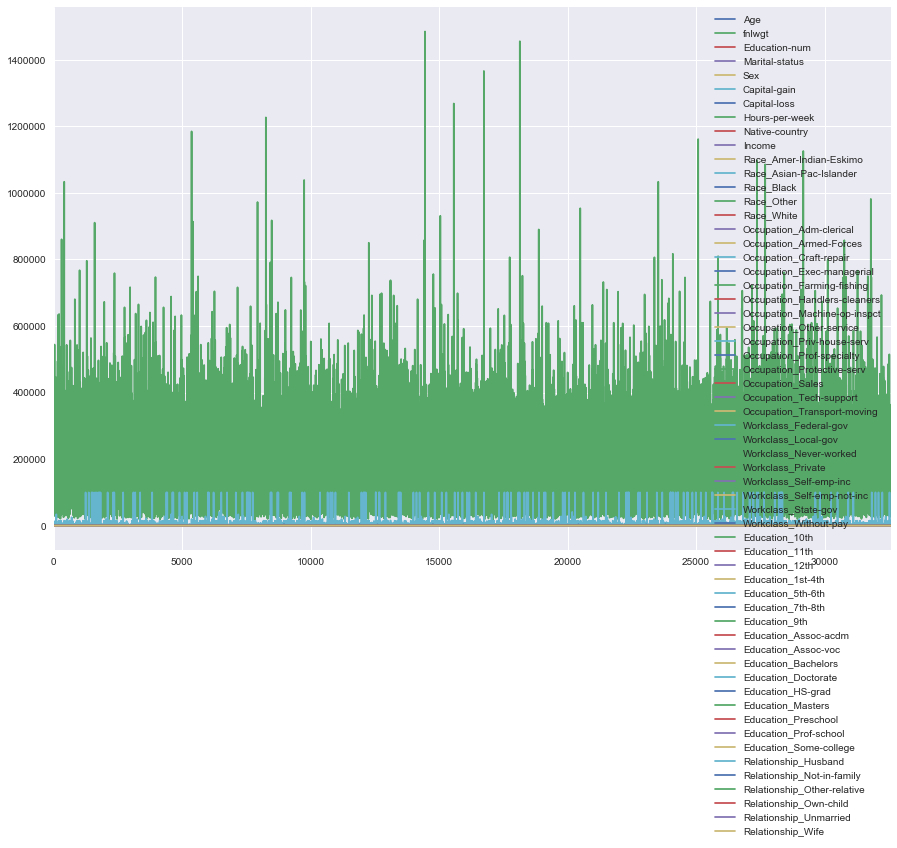

In [90]:
adult.plot(figsize=(15, 10))

In [108]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(adult.shape)
print(X.shape)

(22792, 58)
(9769, 58)
(22792,)
(9769,)
(32561, 59)
(32561, 58)


In [109]:
import sklearn.feature_selection

select = sklearn.feature_selection.SelectKBest(k=20)
selected_features = select.fit(X_train, y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [X1.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]

In [110]:
list(colnames_selected)

['Age',
 'Education-num',
 'Marital-status',
 'Sex',
 'Capital-gain',
 'Capital-loss',
 'Hours-per-week',
 'Occupation_Craft-repair',
 'Occupation_Machine-op-inspct',
 'Occupation_Priv-house-serv',
 'Workclass_Private',
 'Education_Assoc-voc',
 'Education_Bachelors',
 'Education_HS-grad',
 'Education_Preschool',
 'Education_Some-college',
 'Relationship_Husband',
 'Relationship_Other-relative',
 'Relationship_Own-child',
 'Relationship_Unmarried']

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

def find_model_perf(X_train, y_train, X_test, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_hat = [x[1] for x in model.predict_proba(X_test)]
    auc = roc_auc_score(y_test, y_hat)
    
    return auc

In [112]:
auc_processed = find_model_perf(X_train_selected, y_train, X_test_selected, y_test)
print(auc_processed)

0.894830915423
